In [1]:
pip install pandas pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np

In [4]:
gss_df = pd.read_stata("/Users/mehmetbagdinli/Desktop/GSS2022.dta")   # dosya yolunu yaz
print(gss_df.head())
print("rows and columns", gss_df.shape)


/var/folders/fq/hry5knqn05n0lrcxpj8fdw_r0000gn/T/ipykernel_37609/3857414048.py:1: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  gss_df = pd.read_stata("/Users/mehmetbagdinli/Desktop/GSS2022.dta")   # dosya yolunu yaz


   year  id                                            wrkstat  hrs1  hrs2  \
0  2022   1                                  working full time  40.0   NaN   
1  2022   2                                            retired   NaN   NaN   
2  2022   3                                  working full time  52.0   NaN   
3  2022   4  with a job, but not at work because of tempora...   NaN  25.0   
4  2022   5                                              other   NaN   NaN   

  evwork        wrkslf                                          occ10  \
0    NaN  someone else                            managers, all other   
1    yes  someone else                   marketing and sales managers   
2    NaN  someone else                            personal care aides   
3    NaN  someone else                    food servers, nonrestaurant   
4    yes  someone else  industrial and refractory machinery mechanics   

  prestg10                                            indus10  ... rheight  \
0     39.0    

In [5]:
print(gss_df.columns, gss_df.head(1).T)

Index(['year', 'id', 'wrkstat', 'hrs1', 'hrs2', 'evwork', 'wrkslf', 'occ10',
       'prestg10', 'indus10',
       ...
       'rheight', 'instype01', 'instype02', 'instype03', 'instype04',
       'totalincentive', 'wtssps_nea', 'wtssnrps_nea', 'wtssps_next',
       'wtssnrps_next'],
      dtype='object', length=879)                                 0
year                         2022
id                              1
wrkstat         working full time
hrs1                         40.0
hrs2                          NaN
...                           ...
totalincentive                177
wtssps_nea                    NaN
wtssnrps_nea                  NaN
wtssps_next              0.230979
wtssnrps_next            0.267499

[879 rows x 1 columns]


In [6]:
gss_df.columns.tolist()

['year',
 'id',
 'wrkstat',
 'hrs1',
 'hrs2',
 'evwork',
 'wrkslf',
 'occ10',
 'prestg10',
 'indus10',
 'marital',
 'martype',
 'divorce',
 'widowed',
 'sppres80',
 'spocc10',
 'sppres10',
 'spind10',
 'coocc10',
 'coind10',
 'mawrkslf',
 'sibs',
 'childs',
 'age',
 'agekdbrn',
 'educ',
 'degree',
 'major1',
 'dipged',
 'sex',
 'race',
 'res16',
 'reg16',
 'family16',
 'famdif16',
 'mawrkgrw',
 'incom16',
 'born',
 'parborn',
 'granborn',
 'adults',
 'unrelat',
 'earnrs',
 'income',
 'rincome',
 'income16',
 'rincom16',
 'region',
 'partyid',
 'vote16',
 'pres16',
 'if16who',
 'polviews',
 'natspac',
 'natenvir',
 'natheal',
 'natcity',
 'natcrime',
 'natdrug',
 'nateduc',
 'natrace',
 'natarms',
 'nataid',
 'natfare',
 'natroad',
 'natsoc',
 'natmass',
 'natpark',
 'natchld',
 'natsci',
 'natenrgy',
 'natspacy',
 'natenviy',
 'nathealy',
 'natcityy',
 'natcrimy',
 'natdrugy',
 'nateducy',
 'natracey',
 'natarmsy',
 'nataidy',
 'natfarey',
 'eqwlth',
 'spkath',
 'colath',
 'libath',
 '

In [7]:
total_missing = gss_df.isna().sum().sum()
print("total kayıp sayısı", total_missing)


missing_by_col = gss_df.isna().sum().sort_values(ascending=False)
print("en fazla değer kaybına sahip kolonlar",missing_by_col.head(20))  


missing_pct = (gss_df.isna().mean() * 100).sort_values(ascending=False)
print(missing_pct.head(20))

rows_with_missing = gss_df.isna().any(axis=1).sum()
print("Rows with ≥1 missing:", rows_with_missing)


total kayıp sayısı 1581685
en fazla değer kaybına sahip kolonlar sampcode        3544
copres10        3544
brv16chinum     3544
brv16daunum     3544
brv16sonnum     3544
racopenv        3544
letinhsp        3544
letinasn        3544
parborn         3544
sppres80        3544
cosei10         3544
instype02       3544
instype03       3544
version         3544
marcohrt        3544
instype04       3543
brv16spnum      3541
brv16partnum    3539
brv5chinum      3533
stoptyramt      3530
dtype: int64
sampcode        100.000000
copres10        100.000000
brv16chinum     100.000000
brv16daunum     100.000000
brv16sonnum     100.000000
racopenv        100.000000
letinhsp        100.000000
letinasn        100.000000
parborn         100.000000
sppres80        100.000000
cosei10         100.000000
instype02       100.000000
instype03       100.000000
version         100.000000
marcohrt        100.000000
instype04        99.971783
brv16spnum       99.915350
brv16partnum     99.858916
brv5chinum      

hocam merhaba bu veri setini biraz karıştırdığım kadar ve çok da detayına girmeden dindarlık sendika güveniyle ilgili verilerin olduğunu gördüm bundan yola çıkarak da final ödevi öncesi ufak ısınma gibi bunu Basit bir OLSle burda yapayim dedim


In [16]:
import pandas as pd
import seaborn as sns
import os
from scipy import stats
import statsmodels.stats.api as sms
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf


y_col = "union" if "union" in gss_df.columns else "union1" #iki tane union değeri var
data = gss_df[["attend", y_col, "age", "educ", "income"]].copy()


In [17]:
data.describe().T

,count,unique,top,freq
attend,3509,9,never,1149
union,2349,4,"no, neither belong",2077
age,3336.0,72.0,32.0,76.0
educ,3524.0,21.0,12.0,909.0
income,3110,12,"$25,000 or more",2429


Hala bazı değerler kategorical o sebeple onları handbooktaki değerler gibi fixliyorum

In [18]:

attend_map = {
    "NEVER": 0,
    "LESS THAN ONCE A YEAR": 1,
    "ABOUT ONCE OR TWICE A YEAR": 2,
    "SEVERAL TIMES A YEAR": 3,
    "ABOUT ONCE A MONTH": 4,
    "2-3 TIMES A MONTH": 5,
    "NEARLY EVERY WEEK": 6,
    "EVERY WEEK": 7,
    "SEVERAL TIMES A WEEK": 8
}


union1_map = {
    "YES, RESPONDENT BELONGS": 1,
    "YES, SPOUSE OR PARTNER BELONGS": 2,
    "YES, BOTH BELONG": 3,
    "NO, NEITHER BELONG": 4
}


income_mid_map = {
    "UNDER $1,000": 500,
    "$1,000 TO $2,999": 2000,
    "$3,000 TO $3,999": 3500,
    "$4,000 TO $4,999": 4500,
    "$5,000 TO $5,999": 5500,
    "$6,000 TO $6,999": 6500,
    "$7,000 TO $7,999": 7500,
    "$8,000 TO $9,999": 9000,
    "$10,000 TO $14,999": 12500,
    "$15,000 TO $19,999": 17500,
    "$20,000 TO $24,999": 22500,
    "$25,000 OR MORE": 30000
}

attend_str = data["attend"].astype(str).str.strip().str.upper()
data["attend"] = pd.to_numeric(attend_str, errors="coerce")
data.loc[data["attend"].isna(), "attend"] = attend_str[data["attend"].isna()].map(attend_map)


y_str = data[y_col].astype(str).str.strip().str.upper()
data[y_col] = pd.to_numeric(y_str, errors="coerce")
data.loc[data[y_col].isna(), y_col] = y_str[data[y_col].isna()].map(union1_map)


income_str = data["income"].astype(str).str.strip().str.upper()
data["income"] = pd.to_numeric(income_str, errors="coerce")
data["income_mid"] = data["income"]  
data.loc[data["income_mid"].isna(), "income_mid"] = income_str[data["income_mid"].isna()].map(income_mid_map)
data["income_mid"] = pd.to_numeric(data["income_mid"], errors="coerce")


data["age"] = pd.to_numeric(data["age"], errors="coerce")
data["educ"] = pd.to_numeric(data["educ"], errors="coerce")


data["union_member"] = np.where(data[y_col].isin([1, 2, 3]), 1,
                         np.where(data[y_col] == 4, 0, np.nan))


In [19]:
data[["attend", "union_member", "age", "educ", "income_mid"]].describe().T

,count,mean,std,min,25%,50%,75%,max
attend,3509.0,2.681106,2.696769,0.0,0.0,2.0,5.0,8.0
union_member,2300.0,0.096957,0.295963,0.0,0.0,0.0,0.0,1.0
age,3317.0,48.949352,17.769699,18.0,34.0,48.0,64.0,88.0
educ,3521.0,14.120136,2.865557,1.0,12.0,14.0,16.0,20.0
income_mid,3110.0,26494.212219,7405.334716,500.0,30000.0,30000.0,30000.0,30000.0


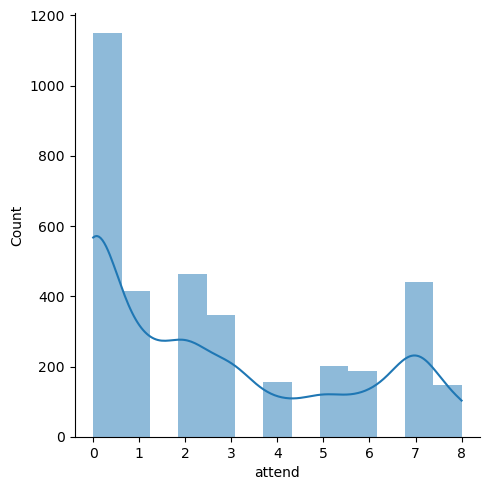

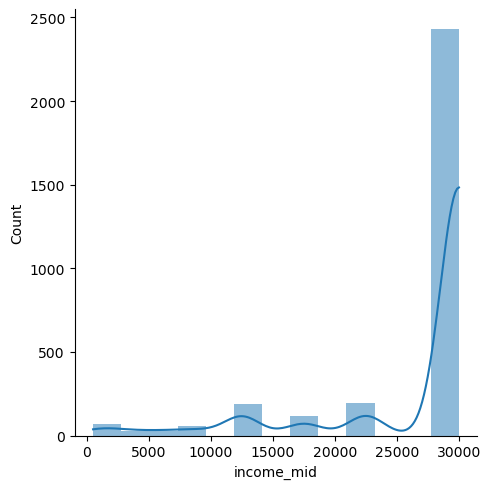

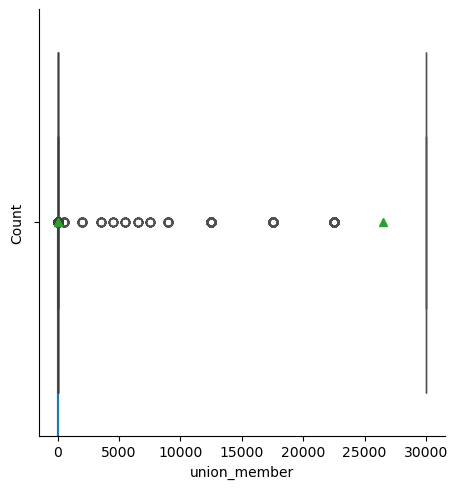

In [20]:
sns.displot(x="attend", data=data, linewidth=0, kde=True)
sns.displot(x="income_mid", data=data, linewidth=0, kde=True)
sns.displot(x="union_member", data=data, linewidth=0, kde=True)

sns.boxplot(x=data["attend"], showmeans=True)
sns.boxplot(x=data["income_mid"], showmeans=True)
sns.boxplot(x=data["union_member"], showmeans=True)

plt.show()

Dindarlığın sendikal etkisine iki grup oluşturarak bakarsam, 6 dan büyükse dindar yoksa değil

In [25]:
high = data[data["attend"] >= 4]["union_member"].dropna()
low  = data[data["attend"] <= 1]["union_member"].dropna()

model = sms.CompareMeans.from_data(high, low)
model.summary(usevar="pooled")
#dünyanın en anlamsız çıktısını verdi

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.0050,0.014,0.352,0.725,-0.023,0.033


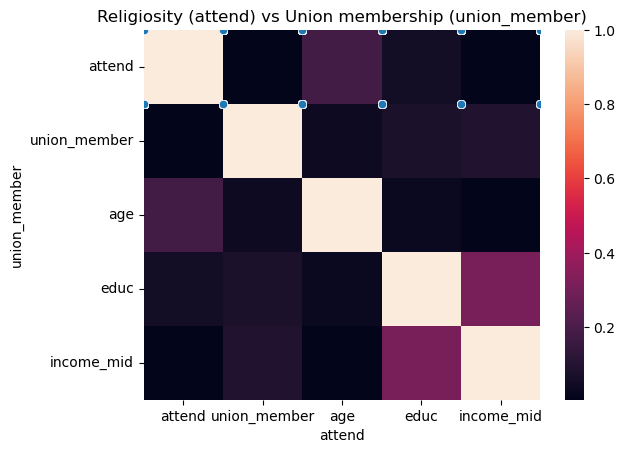

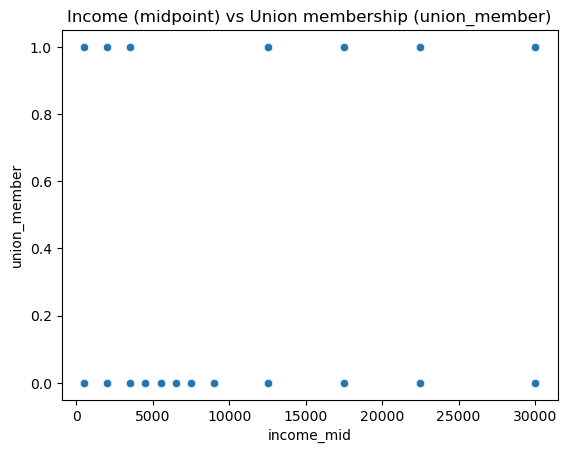

In [26]:
corr_matrix = data[["attend", "union_member", "age", "educ", "income_mid"]].dropna().corr()
corr_matrix

sns.heatmap(corr_matrix)

sns.scatterplot(x="attend", y="union_member", data=data)
plt.title("Religiosity (attend) vs Union membership (union_member)")
plt.xlabel("attend")
plt.ylabel("union_member")
plt.show()

sns.scatterplot(x="income_mid", y="union_member", data=data)
plt.title("Income (midpoint) vs Union membership (union_member)")
plt.xlabel("income_mid")
plt.ylabel("union_member")
plt.show()


In [27]:
y = data["union_member"]
X = data[["attend", "age", "educ", "income_mid"]]
X = sm.add_constant(X)

model = sm.OLS(y, X, missing="drop")
model_result = model.fit()
model_result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           union_member   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     5.982
Date:                Thu, 18 Dec 2025   Prob (F-statistic):           8.79e-05
Time:                        18:26:19   Log-Likelihood:                -381.38
No. Observations:                1926   AIC:                             772.8
Df Residuals:                    1921   BIC:                             800.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0826      0.040     -2.044      0.041      -0.162      -0.003
attend        -0.0005      0.003     -0.193      0.847      -0.006       0.005
age            0.0006      0.000      1.505      0.133      -0.000       0.001
educ           0.0052      0.002      2.133      0.033       0.000       0.010
income_mid  3.008e-06   9.26e-07      3.249      0.001    1.19e-06    4.82e-06
==============================================================================
Omnibus:                     1005.615   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4438.160
Skew:                           2.659   Prob(JB):                         0.00
Kurtosis:                       8.198   Cond. No.                     1.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

hocam çıktımız çok anlamsız ve istatistiksel olarak açıklayıcılık gücü çok zayıf çıktı. F testi yüksek olsa da açıklayıcılığı çok düşük Rkare ye bağdığımızda model sadece sapmanın yüzde birini açıklayabiliyor

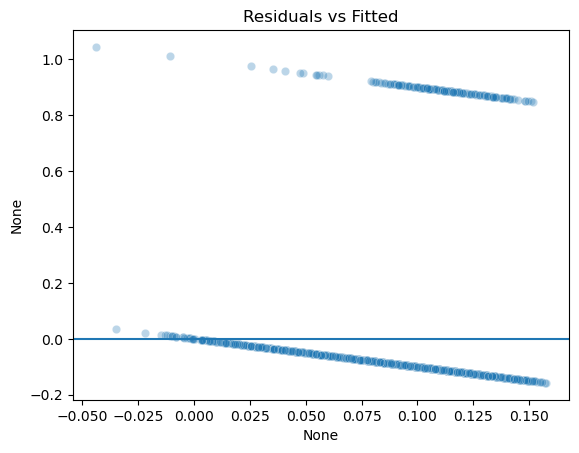

Breusch–Pagan p-value: 3.8517226484183645e-05
Jarque–Bera p-value: 0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           union_member   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     8.423
Date:                Thu, 18 Dec 2025   Prob (F-statistic):           9.80e-07
Time:                        18:28:49   Log-Likelihood:                -381.38
No. Observations:                1926   AIC:                             772.8
Df Residuals:                    1921   BIC:                             800.6
Df Model:                           4                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0826      0.037     -2.262      0.024      -0.154      -0.011
attend        -0.0005      0.003     -0.195      0.845      -0.005       0.004
age            0.0006      0.000      1.626      0.104      -0.000       0.001
educ           0.0052      0.003      1.957      0.050    -8.5e-06       0.010
income_mid  3.008e-06   7.23e-07      4.161      0.000    1.59e-06    4.42e-06
==============================================================================
Omnibus:                     1005.615   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4438.160
Skew:                           2.659   Prob(JB):                         0.00
Kurtosis:                       8.198   Cond. No.                     1.64e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 1.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
m = sm.OLS(y, X, missing="drop").fit()
resid = m.resid
fitted = m.fittedvalues

sns.scatterplot(x=fitted, y=resid, alpha=0.3)
plt.axhline(0)
plt.title("Residuals vs Fitted")
plt.show()

#homoskedastisity
bp = sms.het_breuschpagan(resid, m.model.exog)
print("Breusch–Pagan p-value:", bp[1])

#normalliği
print("Jarque–Bera p-value:", sms.jarque_bera(resid)[1])

# roboustlanmış sonuç
m_robust = sm.OLS(y, X, missing="drop").fit(cov_type="HC3")
m_robust.summary()